In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [ ]:
import tensorflow as tf
import time
reset_graph(np.int32(time.time()))

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

In [ ]:
sess=tf.Session()

sess.run(x.initializer)
sess.run(y.initializer)

In [ ]:
sess.run(f)

In [ ]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    result=sess.run(f)

In [ ]:
print(result)

# Graph management

In [ ]:
g1 = tf.Graph()

In [ ]:
with g1.as_default():
    x2 = tf.Variable(2,dtype=tf.int32)
    c = tf.constant(5,dtype=tf.int32)
    y = x2 * 2 +c

In [ ]:
a = np.array([1,2,3])
with tf.Session(graph=g1) as sess:
    tf.global_variables_initializer()
    result=sess.run(y,feed_dict= {x2:1})
    

In [ ]:
print(result)

In [ ]:
g1 is tf.get_default_graph()

In [ ]:
#Tensor flow run the 2 session independently
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3
V = tf.Variable(2)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(y.eval())  # 10
    print(z.eval())  # 15
    sess.run(y+V)
    print(V.eval())
    
with tf.Session() as sess:
    sess.run(init)
    y_val, z_val = sess.run([y, z])
    print(y_val)  # 10
    print(z_val)  # 15
    print(V.eval())

In [ ]:
y

# Linear regression

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]


X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()

In [ ]:
theta_value

# Batch gradient decent

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [ ]:
print(scaled_housing_data_plus_bias.mean(axis=0))

print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

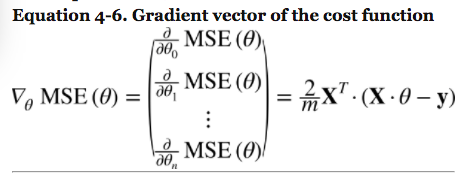
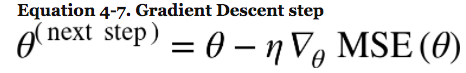

In [ ]:
t = np.int32(time.time())
reset_graph(t)

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=t), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

# with autoDiff (to calculate differentiation for error function)

In [ ]:
from IPython.core.debugger import set_trace
reset_graph(t)

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=t), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")


gradients = tf.gradients(mse, [theta])[0]

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    #set_trace()
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        
        sess.run(training_op)
    
    best_theta2 = theta.eval()

In [ ]:
best_theta-best_theta2

# Using optimizer (to replace with manual Gradient decent)

In [ ]:
from IPython.core.debugger import set_trace
reset_graph(t)

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=t), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

#gradients = tf.gradients(mse, [theta])[0]
#training_op = tf.assign(theta, theta - learning_rate * gradients)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    #set_trace()
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        
        sess.run(training_op)
    
    best_theta3 = theta.eval()

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(best_theta, best_theta3)


In [ ]:
np.average(np.square(best_theta-best_theta3))

In [ ]:
from IPython.core.debugger import set_trace
reset_graph(t)

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=t), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

#gradients = tf.gradients(mse, [theta])[0]
#training_op = tf.assign(theta, theta - learning_rate * gradients)

optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    #set_trace()
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        
        sess.run(training_op)
        #training_op.eval() #'Operation' object has no attribute 'eval'
    
    best_theta4 = theta.eval()
    print(tf.get_default_session() is sess)

In [ ]:
best_theta4

In [ ]:
np.average(np.square(best_theta-best_theta4))

# Feeding data into algorithm
Placeholder nodes

In [ ]:
reset_graph()

A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5
with tf.Session() as sess:
    B_val_1 = sess.run(B,feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print(B_val_1)
print(B_val_2)

# Mini-batch gradient decent

In [ ]:
#from IPython.core.debugger import set_trace
reset_graph(t)
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [ ]:


n_epochs = 1000
learning_rate = 0.01

#X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
#y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=t), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

#gradients = tf.gradients(mse, [theta])[0]
#training_op = tf.assign(theta, theta - learning_rate * gradients)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()


In [ ]:
batch_size = 100
n_epochs = 1000
n_batches = int(np.ceil(m / batch_size))

In [ ]:
def fetch_batch(epoch, batch_index, batch_size):
    
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if(epoch%100 == 0 ):
            print("Epoch", epoch, "MSE =",mse.eval(feed_dict={X: X_batch, y: y_batch}))
    best_theta = theta.eval()

In [ ]:
best_theta

# Save a model

In [ ]:
#from IPython.core.debugger import set_trace
m, n = housing.data.shape
reset_graph(t)
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

n_epochs = 1000
learning_rate = 0.01

#X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
#y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=t), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

#gradients = tf.gradients(mse, [theta])[0]
#training_op = tf.assign(theta, theta - learning_rate * gradients)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

batch_size = 100
n_epochs = 100
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if(epoch%10 ==0 ):
            print("Epoch", epoch, "MSE =",mse.eval(feed_dict={X: X_batch, y: y_batch}))
            save_path = saver.save(sess, "./tmp/my_model{0}.ckpt".format(epoch*batch_index))
    best_theta = theta.eval()
    
    save_path = saver.save(sess, "./tmp/my_model{0}.ckpt".format("final"))
    print(save_path)

In [ ]:
best_theta

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./tmp/my_modelfinal.ckpt")
    best_theta_restored = theta.eval() # not shown in the book

In [ ]:
np.allclose(best_theta, best_theta_restored)

Load a model . Define a model using .meta save

In [ ]:
reset_graph()
# notice that we start with an empty graph.

saver = tf.train.import_meta_graph("./tmp/my_modelfinal.ckpt.meta")  # this loads the graph structure
theta = tf.get_default_graph().get_tensor_by_name("theta:0") # not shown in the book

with tf.Session() as sess:
    saver.restore(sess, "./tmp/my_modelfinal.ckpt")  # this restores the graph's state
    best_theta_restored = theta.eval() # not shown in the book

In [ ]:
np.allclose(best_theta, best_theta_restored)

# Visualize the data

In [ ]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "./tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

#from IPython.core.debugger import set_trace
m, n = housing.data.shape
reset_graph(t)
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

n_epochs = 1000
learning_rate = 0.01

#X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
#y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=t), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

#gradients = tf.gradients(mse, [theta])[0]
#training_op = tf.assign(theta, theta - learning_rate * gradients)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())


batch_size = 100
n_epochs = 100
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if(epoch%10 ==0 ):
            print("Epoch", epoch, "MSE =",mse.eval(feed_dict={X: X_batch, y: y_batch}))
            save_path = saver.save(sess, "./tmp/my_model{0}.ckpt".format(epoch*batch_index))
            
            summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
            step = epoch * n_batches + batch_index
            file_writer.add_summary(summary_str, step)
    best_theta = theta.eval()
    
    save_path = saver.save(sess, "./tmp/my_model{0}.ckpt".format("final"))
    print(save_path)
    file_writer.close()

# Name scopes

In [ ]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "./tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

#from IPython.core.debugger import set_trace
m, n = housing.data.shape
reset_graph(t)
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

n_epochs = 1000
learning_rate = 0.01

#X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
#y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=t), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")


with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

#gradients = tf.gradients(mse, [theta])[0]
#training_op = tf.assign(theta, theta - learning_rate * gradients)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())


batch_size = 100
n_epochs = 100
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if(epoch%10 ==0 ):
            print("Epoch", epoch, "MSE =",mse.eval(feed_dict={X: X_batch, y: y_batch}))
            save_path = saver.save(sess, "./tmp/my_model{0}.ckpt".format(epoch*batch_index))
            
            summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
            step = epoch * n_batches + batch_index
            file_writer.add_summary(summary_str, step)
    best_theta = theta.eval()
    
    save_path = saver.save(sess, "./tmp/my_model{0}.ckpt".format("final"))
    print(save_path)
    file_writer.close()

In [ ]:
reset_graph()

In [ ]:
best_theta=None

# Load the graph by meta file and load the theta tensor

In [ ]:
reset_graph()
# notice that we start with an empty graph.

saver = tf.train.import_meta_graph("./tmp/my_modelfinal.ckpt.meta")  # this loads the graph structure
theta = tf.get_default_graph().get_tensor_by_name("theta:0") # not shown in the book
with tf.Session() as sess:
    saver.restore(sess, "./tmp/my_modelfinal.ckpt")  # this restores the graph's state
    best_theta_restored = theta.eval() # not shown in the book

In [ ]:
best_theta_restored

# Loading a saved model with code to define the graph


define the graph by code source code first then load model state

In [7]:
import tensorflow as tf
reset_graph()
# notice that we start with an empty graph.

import numpy as np
import time
from sklearn.datasets import fetch_california_housing

reset_graph()
t = np.int32(time.time())
housing = fetch_california_housing()


from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "./tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

#from IPython.core.debugger import set_trace
m, n = housing.data.shape
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

n_epochs = 1000
learning_rate = 0.01

#X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
#y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=t), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")


with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

#gradients = tf.gradients(mse, [theta])[0]
#training_op = tf.assign(theta, theta - learning_rate * gradients)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())


batch_size = 100
n_epochs = 100
n_batches = int(np.ceil(m / batch_size))

#def fetch_batch(epoch, batch_index, batch_size):
    
#    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
#    indices = np.random.randint(m, size=batch_size)  # not shown
#    X_batch = scaled_housing_data_plus_bias[indices] # not shown
#    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
#    return X_batch, y_batch

best_theta_restored=None
with tf.Session() as sess:
    saver.restore(sess, "./tmp/my_modelfinal.ckpt")  # this restores the graph's state
    best_theta_restored = theta.eval() # not shown in the book

In [8]:
best_theta_restored

array([[ 2.0544672 ],
       [ 0.82970113],
       [ 0.10713524],
       [-0.31074819],
       [ 0.24564511],
       [-0.00222412],
       [-0.01061389],
       [-0.89121586],
       [-0.87524796]], dtype=float32)

# Modularlity

# Ugly code

In [ ]:
reset_graph()

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")

z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w2), b2, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z1, 0., name="relu2")  # Oops, cut&paste error! Did you spot it?

output = tf.add(relu1, relu2, name="output")

In [ ]:
file_writer = tf.summary.FileWriter("./logs/relu1", tf.get_default_graph())
file_writer.close()

In [ ]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")    # not shown
        b = tf.Variable(tf.random_normal((1,1)), name="bias")                             # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                      # not shown
        return tf.maximum(z, 0., name="max")                          # not shown

In [ ]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("./logs/relu2", tf.get_default_graph())
file_writer.close()

In [ ]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    result=sess.run(output, feed_dict={X: np.random.randint(10,size=(100,n_features))})

In [ ]:
np.shape(result)

# SHaring variable

In [ ]:
reset_graph()

def relu(X, threshold):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

threshold = tf.Variable(0.0, name="threshold")
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name="output")

In [ ]:
reset_graph()

def relu(X):
    with tf.variable_scope("relu", reuse=True):
        threshold = tf.get_variable("threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
relus = [relu(X) for relu_index in range(5)]
output = tf.add_n(relus, name="output")

In [ ]:
file_writer = tf.summary.FileWriter("./logs/relu6", tf.get_default_graph())
file_writer.close()

In [ ]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    result=sess.run(output, feed_dict={X: np.random.randint(10,size=(100,n_features))})

In [ ]:
reset_graph()

def relu(X):
    with tf.variable_scope("relu"):
        threshold = tf.get_variable("threshold", shape=(), initializer=tf.constant_initializer(0.0))
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("", default_name="") as scope:
    first_relu = relu(X)     # create the shared variable
    scope.reuse_variables()  # then reuse it
    relus = [first_relu] + [relu(X) for i in range(4)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("./logs/relu8", tf.get_default_graph())
file_writer.close()

In [ ]:
reset_graph()

def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
    w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
    w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
    b = tf.Variable(0.0, name="bias")                           # not shown
    z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = []
for relu_index in range(5):
    with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")

In [ ]:
file_writer = tf.summary.FileWriter("./logs/relu9", tf.get_default_graph())
file_writer.close()